In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
import folium
import geopandas as gpd
from geopy.geocoders import Nominatim
from sklearn.cluster import DBSCAN, KMeans, MiniBatchKMeans, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
import collections.abc
from collections.abc import MutableSequence 

from sklearn.manifold import (TSNE)
from sklearn.decomposition import PCA

# Read in the data 

In [2]:
data = pd.read_csv("Cleaned data/Cleaned_Data.csv", index_col=0, parse_dates=['CRASH DATE'])
data['YEAR'] = data['CRASH DATE'].dt.year
data['MONTH'] = data['CRASH DATE'].dt.month
# data = data[data['YEAR']]
data['HOUR'] = data['CRASH TIME'].apply(lambda i:int(i.split(':')[0]))

## Label Encode and apply standard scalar

In [54]:
encoders = []
data_clustering = data.drop(columns = ['CRASH DATE', 'CRASH TIME', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'COLLISION_ID'])
for col in data_clustering.columns:
    if data_clustering[col].dtype == 'O':
        col_encoder = LabelEncoder()
        scaler = StandardScaler()
        data_clustering[col] = col_encoder.fit_transform(data_clustering[col])
    data_clustering[col] = scaler.fit_transform(np.array(data_clustering[col]).reshape(-1, 1))
    encoders.append(col_encoder)

In [4]:
print(data_clustering.isna().sum().sum())
data_clustering.loc[data_clustering['ZIP CODE'].isna(),'ZIP CODE'] = -1
data_clustering.isna().sum().sum()

316467


0

In [5]:
borough = pd.Series(encoders[0].transform(data['BOROUGH']))

In [6]:
# Drop longitude and latitude
data_nl = data_clustering.drop(columns=['LONGITUDE', 'LATITUDE'])

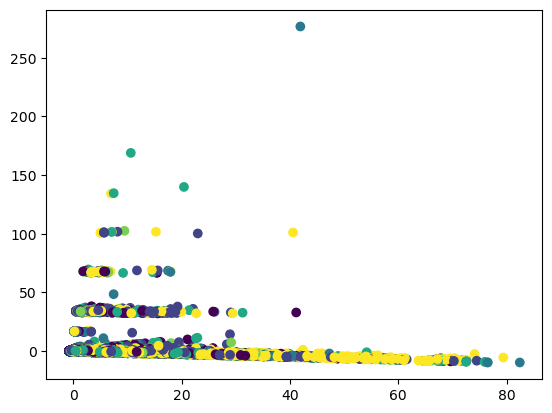

In [7]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_nl)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=borough)

## Drop Borough

In [8]:
# Drop longitude and latitude
data_nl = data_clustering.drop(columns=['LONGITUDE', 'LATITUDE', 'BOROUGH'])

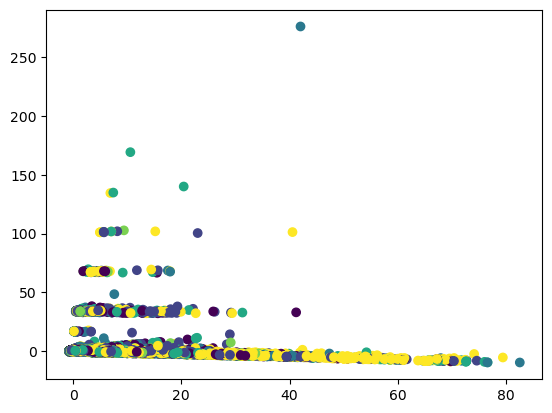

In [9]:
# PCA
pca_nb = PCA(n_components=2)
X_pca_nb = pca_nb.fit_transform(data_nl)
plt.scatter(X_pca_nb[:, 0], X_pca_nb[:, 1], c=borough)

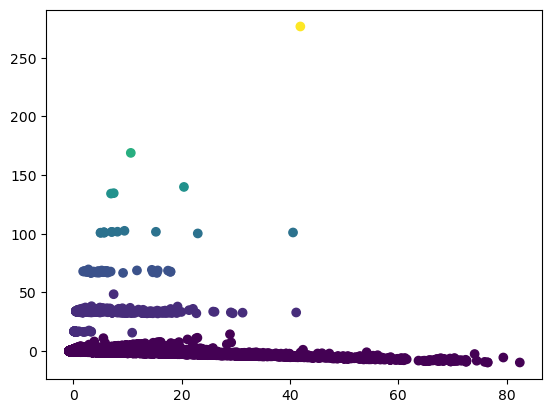

In [41]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['NUMBER OF PERSONS KILLED'])

In [46]:
pd.DataFrame(X_pca).to_csv("X_pca_drop_borough.csv")

In [11]:
pd.Series(encoders[0].transform(data['BOROUGH'])).unique()

array([3, 1, 5, 0, 2, 4])

In [12]:
data['BOROUGH'].unique()

array(['QUEENS', 'BROOKLYN', nan, 'BRONX', 'MANHATTAN', 'STATEN ISLAND'],
      dtype=object)

## Drop zipcode as well

In [55]:
data_nl = data_clustering.drop(columns=['LATITUDE', 'LONGITUDE', 'BOROUGH', 'ZIP CODE'])

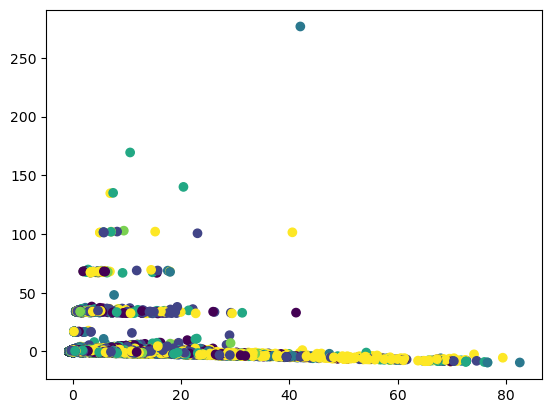

In [14]:
pca_nz = PCA(n_components=2)
X_pca_nz = pca_nz.fit_transform(data_nl)
plt.scatter(X_pca_nz[:, 0], X_pca_nz[:, 1], c=borough)

In [15]:
data_nl.columns

Index(['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'YEAR', 'MONTH', 'HOUR'],
      dtype='object')

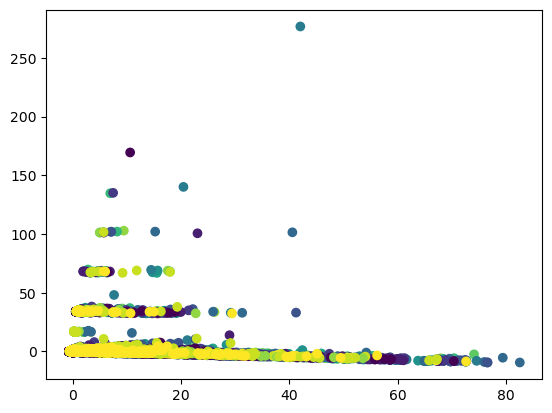

In [16]:
plt.scatter(X_pca_nz[:, 0], X_pca_nz[:, 1], c=data_nl['YEAR'])

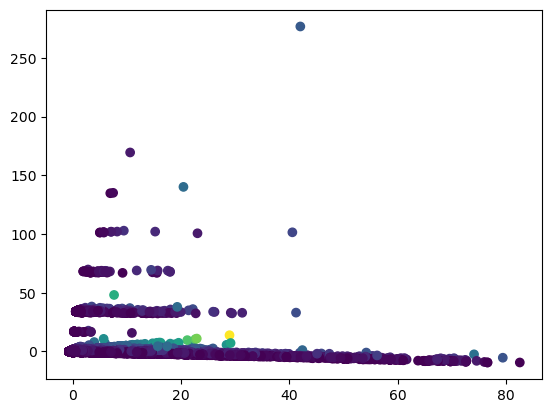

In [17]:
plt.scatter(X_pca_nz[:, 0], X_pca_nz[:, 1], c=data_nl['NUMBER OF PERSONS INJURED'])

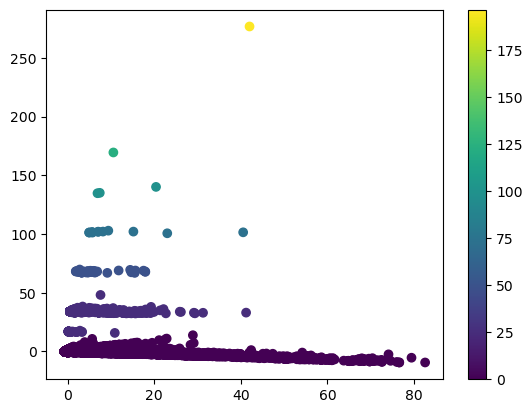

In [56]:
plt.scatter(X_pca_nz[:, 0], X_pca_nz[:, 1], c=data_nl['NUMBER OF PERSONS KILLED'])
plt.colorbar()
plt.show()

In [52]:
plt.viridis()

<Figure size 640x480 with 0 Axes>

In [45]:
pd.DataFrame(X_pca_nz).to_csv("PCA_no_zipcode.csv")

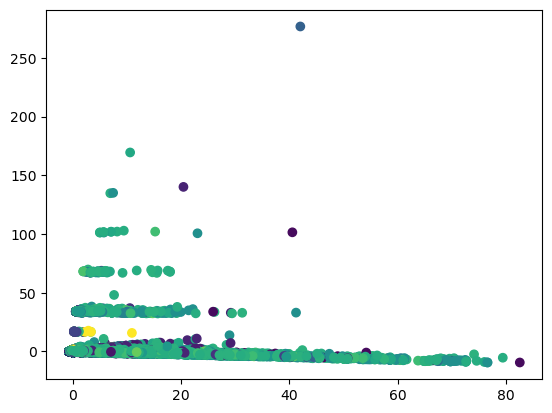

In [19]:
plt.scatter(X_pca_nz[:, 0], X_pca_nz[:, 1], c=data_nl['VEHICLE TYPE CODE 1'])

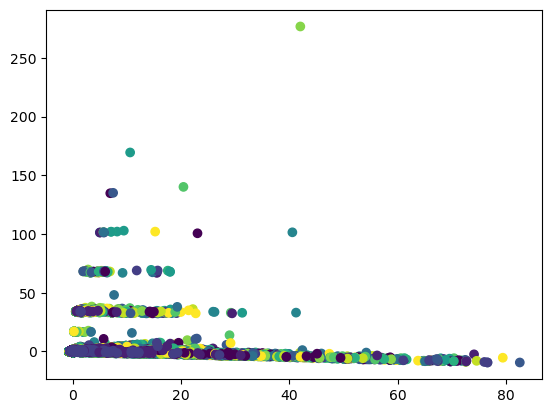

In [20]:
plt.scatter(X_pca_nz[:, 0], X_pca_nz[:, 1], c=data_nl['MONTH'])

## Drop na data and then run

In [22]:
encoders = []
data_clustering = data.drop(columns = ['CRASH DATE', 'CRASH TIME', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'COLLISION_ID'])
data_clustering.dropna(subset=['ZIP CODE'])
for col in data_clustering.columns:
    if data_clustering[col].dtype == 'O':
        col_encoder = LabelEncoder()
        scaler = StandardScaler()
        data_clustering[col] = col_encoder.fit_transform(data_clustering[col])
    data_clustering[col] = scaler.fit_transform(np.array(data_clustering[col]).reshape(-1, 1))
    encoders.append(col_encoder)

In [23]:
data_nl = data_clustering.drop(columns = ['LATITUDE', 'LONGITUDE', 'BOROUGH', 'ZIP CODE'])

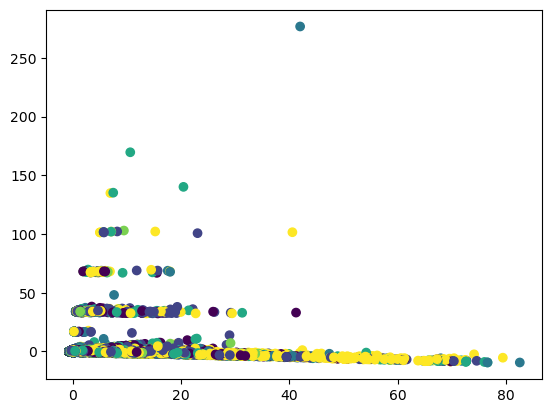

In [24]:
pca_dn = PCA(n_components=2)
X_pca_dn = pca_dn.fit_transform(data_nl)
plt.scatter(X_pca_dn[:, 0], X_pca_dn[:, 1], c=borough)

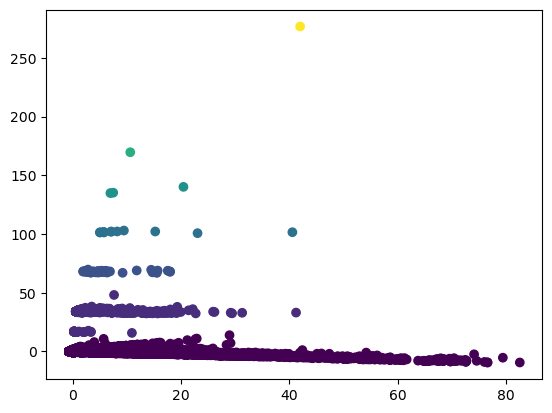

In [25]:
plt.scatter(X_pca_dn[:, 0], X_pca_dn[:, 1], c=data_clustering['NUMBER OF PERSONS KILLED'])

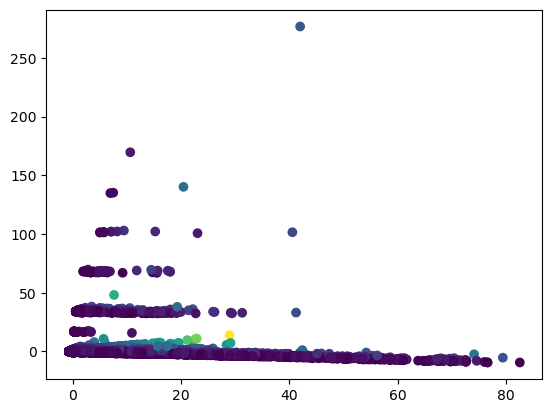

In [29]:
plt.scatter(X_pca_dn[:, 0], X_pca_dn[:, 1], c=data_clustering['NUMBER OF PERSONS INJURED'])

In [47]:
pd.DataFrame(X_pca_dn).to_csv("PCA_no_null_zipcode.csv")

### TSNE

In [ ]:
tsne = TSNE(n_components=2, learning_rate="auto", init="random", perplexity=20)
X_tsne_dn = tsne.fit_transform(data_nl)
plt.scatter(X_tsne_dn[:, 0], X_tsne_dn[:, 1], c=data_clustering['NUMBER OF PERSONS KILLED'])

## Drop where 0 or less injuries

In [33]:
encoders = []
data_clustering = data.drop(columns = ['CRASH DATE', 'CRASH TIME', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'COLLISION_ID'])
data_clustering.dropna(subset=['ZIP CODE'])
data_clustering = data_clustering[data_clustering['NUMBER OF PERSONS INJURED']>0]
for col in data_clustering.columns:
    if data_clustering[col].dtype == 'O':
        col_encoder = LabelEncoder()
        scaler = StandardScaler()
        data_clustering[col] = col_encoder.fit_transform(data_clustering[col])
    data_clustering[col] = scaler.fit_transform(np.array(data_clustering[col]).reshape(-1, 1))
    encoders.append(col_encoder)

In [34]:
data_nl = data_clustering.drop(columns = ['LATITUDE', 'LONGITUDE', 'BOROUGH', 'ZIP CODE'])

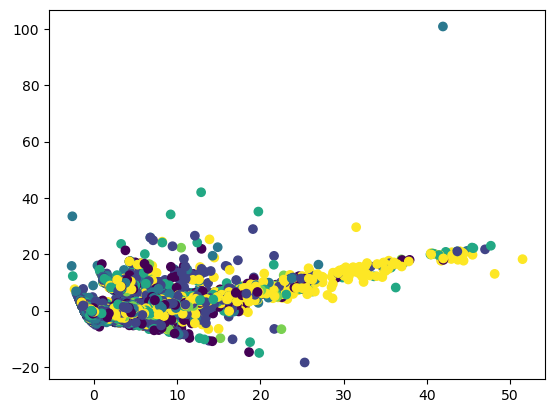

In [37]:
pca_i = PCA(n_components=2)
X_pca_i = pca_dn.fit_transform(data_nl)
plt.scatter(X_pca_i[:, 0], X_pca_i[:, 1], c=data_clustering['BOROUGH'])

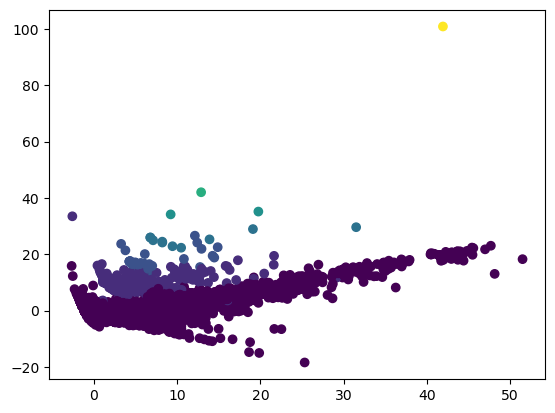

In [38]:
plt.scatter(X_pca_i[:, 0], X_pca_i[:, 1], c=data_clustering['NUMBER OF PERSONS KILLED'])

In [48]:
pd.DataFrame(X_pca_i).to_csv("PCA_injuries.csv")

### TSNE

In [39]:
tsne = TSNE(n_components=2, learning_rate="auto", init="random", perplexity=20)
X_tsne_i = tsne.fit_transform(data_nl)
plt.scatter(X_tsne_i[:, 0], X_tsne_i[:, 1], c=data_clustering['NUMBER OF PERSONS KILLED'])

KeyboardInterrupt: 

In [31]:
data['NUMBER OF PERSONS KILLED'].value_counts(normalize=True)

NUMBER OF PERSONS KILLED
0.0    9.985612e-01
1.0    1.395739e-03
2.0    3.448773e-05
3.0    6.086069e-06
4.0    1.521517e-06
8.0    5.071724e-07
5.0    5.071724e-07
Name: proportion, dtype: float64

In [32]:
data['NUMBER OF PERSONS INJURED'].value_counts(normalize=True)

NUMBER OF PERSONS INJURED
0.0     7.698649e-01
1.0     1.793255e-01
2.0     3.326189e-02
3.0     1.081951e-02
4.0     4.003619e-03
5.0     1.527603e-03
6.0     6.304153e-04
7.0     2.682942e-04
8.0     1.156353e-04
9.0     5.781766e-05
10.0    4.209531e-05
11.0    2.383710e-05
12.0    1.521517e-05
13.0    1.318648e-05
15.0    6.593242e-06
14.0    4.564552e-06
16.0    3.550207e-06
17.0    3.043035e-06
18.0    3.043035e-06
24.0    1.521517e-06
19.0    1.521517e-06
22.0    1.521517e-06
20.0    1.014345e-06
31.0    5.071724e-07
27.0    5.071724e-07
32.0    5.071724e-07
43.0    5.071724e-07
21.0    5.071724e-07
23.0    5.071724e-07
34.0    5.071724e-07
25.0    5.071724e-07
Name: proportion, dtype: float64

array([[<Axes: title={'center': 'HOUR'}>]], dtype=object)

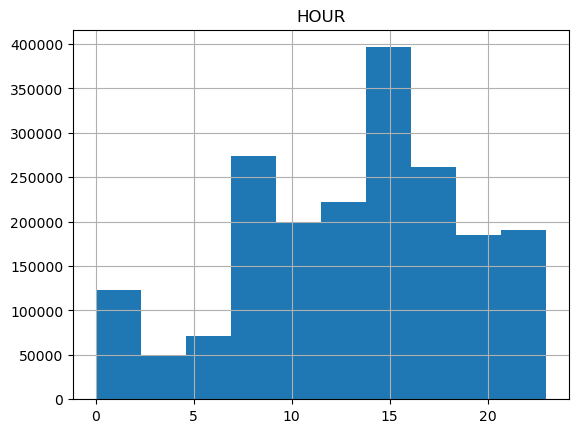

In [27]:
data.hist(['HOUR'])

In [18]:
data.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'YEAR', 'MONTH', 'HOUR'],
      dtype='object')

C:\Users\aradh\AppData\Local\Temp\ipykernel_9296\1933607321.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.cm.get_cmap('tab10')


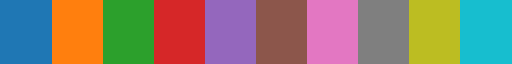

In [26]:
plt.cm.get_cmap('tab10')

C:\Users\aradh\AppData\Local\Temp\ipykernel_9296\1146159799.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.cm.get_cmap('viridis')


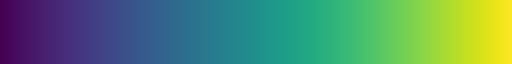

In [27]:
plt.cm.get_cmap('viridis')

## Under assumption that Yellow is data where borough is NaN

In [28]:
data = pd.read_csv("Cleaned data/Cleaned_Data.csv", index_col=0, parse_dates=['CRASH DATE'])
data['YEAR'] = data['CRASH DATE'].dt.year
data['MONTH'] = data['CRASH DATE'].dt.month
# data = data[data['YEAR']]
data['HOUR'] = data['CRASH TIME'].apply(lambda i:int(i.split(':')[0]))
print(data.shape)
data = data.dropna(subset=['BOROUGH'])
print(data.shape)

(1971716, 32)
(1655389, 32)


In [29]:
encoders = []
data_clustering = data.drop(columns = ['CRASH DATE', 'CRASH TIME', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'COLLISION_ID'])
for col in data_clustering.columns:
    if data_clustering[col].dtype == 'O':
        col_encoder = LabelEncoder()
        scaler = StandardScaler()
        data_clustering[col] = scaler.fit_transform(np.array(col_encoder.fit_transform(data_clustering[col])).reshape(-1, 1))
        encoders.append(col_encoder)

In [30]:
data_clustering.dtypes

BOROUGH                          float64
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1    float64
CONTRIBUTING FACTOR VEHICLE 2    float64
CONTRIBUTING FACTOR VEHICLE 3    float64
CONTRIBUTING FACTOR VEHICLE 4    float64
CONTRIBUTING FACTOR VEHICLE 5    float64
VEHICLE TYPE CODE 1              float64
VEHICLE TYPE CODE 2              float64
VEHICLE TYPE CODE 3              float64
VEHICLE TYPE CODE 4              float64
VEHICLE TYPE CODE 5              float64
YEAR                               int32
MONTH                              int32
HOUR            

In [31]:
data_clustering[['LONGITUDE', 'LATITUDE']].describe()

,LONGITUDE,LATITUDE
count,1.655389e+06,1.655389e+06
mean,-7.392203e+01,4.072363e+01
std,8.232684e-02,7.900379e-02
min,-7.425496e+01,4.049895e+01
25%,-7.397588e+01,4.066768e+01
50%,-7.393023e+01,4.071990e+01
75%,-7.387238e+01,4.076880e+01
max,-7.370055e+01,4.091288e+01


In [32]:
data_clustering.loc[data_clustering['ZIP CODE'].isna(),'ZIP CODE'] = -1
data_clustering.isna().sum().sum()

0

In [33]:
# Drop longitude and latitude
data_nl = data_clustering.drop(columns=['LONGITUDE', 'LATITUDE', 'BOROUGH'])

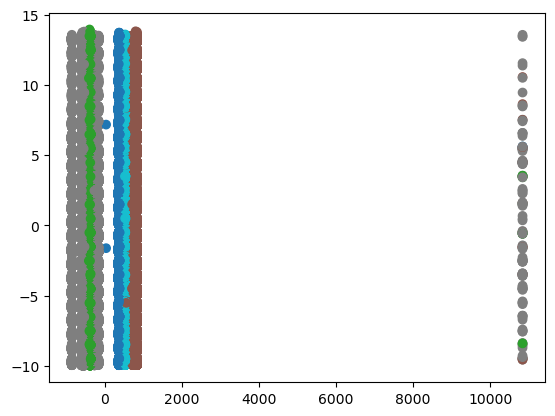

In [35]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_nl)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data_clustering['BOROUGH'], cmap='tab10')

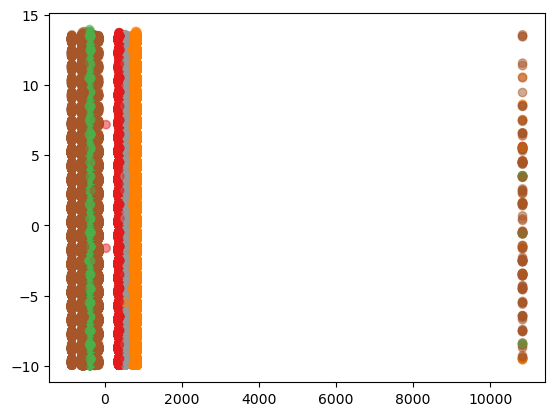

In [37]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data_clustering['BOROUGH'], cmap='Set1', alpha=0.5)

In [40]:
data['BOROUGH'].unique()

array(['QUEENS', 'BROOKLYN', 'BRONX', 'MANHATTAN', 'STATEN ISLAND'],
      dtype=object)

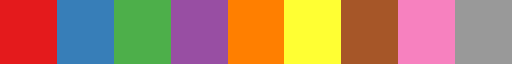

In [41]:
plt.get_cmap('Set1')